# <center>        **Natural Language Processing - ASSIGNMENT 1**</center>

DatasetLink: https://www.kaggle.com/datasets/thedevastator/medical-conversation-corpus-100k



**Problem Statement:**

The goal of Part I of the task is to use raw textual data in language models for recommendation based application.

The goal of Part II of task is to implement comprehensive preprocessing steps for a given dataset, enhancing the quality and relevance of the textual information. The preprocessed text is then transformed into a feature-rich representation using a chosen vectorization method for further use in the application to perform similarity analysis.

# **Part I**

**Sentence comparison using N-gram:**

Let a search engine powered by language model recommend which of the below sentences are most relevant w.r.t to given training corpus. Design a probabilistic language model to compare below test sentences for recommendation using Bigram. Use all the instances in the dataset as a training corpus.

Test Sentence 1:

I get pain on my forehead and on both sides of my eyes everyday morning


Test Sentence 2:

The newly released iPhone has excellent features

In [1]:
# Importing necessary Libraries
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk import bigrams
from nltk.corpus import stopwords
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.probability import FreqDist, ConditionalFreqDist

import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [2]:
# Load the dataset
import pandas as pd

# Read the CSV file
df = pd.read_csv('train.csv', engine='python',  on_bad_lines='warn', encoding='utf-8')
training_corpus = df['Conversation'].tolist()

Skipping line 9051: unexpected end of data


In [3]:
# Test sentences
test_sentence_1 = "I get pain on my forehead and on both sides of my eyes everyday morning"
test_sentence_2 = "The newly released iPhone has excellent features"

In [4]:
# Tokenize the training corpus into bigrams
corpus_bigrams = [bigram for sentence in training_corpus for bigram in list(bigrams(nltk.word_tokenize(str(sentence).lower())))]

In [5]:
# Create a frequency distribution for bigrams
bigram_freq_dist = FreqDist(corpus_bigrams)

In [6]:
# Create a conditional frequency distribution for bigrams
cond_freq_dist = ConditionalFreqDist(corpus_bigrams)

In [7]:
def calculate_sentence_probability(sentence):
    sentence_bigrams = list(bigrams(nltk.word_tokenize(str(sentence).lower())))
    probability = 1.0

    for bigram in sentence_bigrams:
        word1, word2 = bigram
        probability *= (cond_freq_dist[word1][word2] + 1) / (bigram_freq_dist[word1] + len(bigram_freq_dist))

    return probability

In [8]:
# Calculate probabilities for test sentences
probability_test_sentence_1 = calculate_sentence_probability(test_sentence_1)
probability_test_sentence_2 = calculate_sentence_probability(test_sentence_2)

In [9]:
# Compare and recommend
if probability_test_sentence_1 > probability_test_sentence_2:
    print("Recommendation: Test Sentence 1")
else:
    print("Recommendation: Test Sentence 2")

Recommendation: Test Sentence 2


# **Observation:**


*   The code recommends **Test Sentence 2** is more relevant. Despite being a medical conversation corpus, the code recommends a non-medical sentence.
*   Medical conversations are complex and may involve specific terminologies not well-captured by simple bigram models.

# **Inferences:**


*   The complexity of medical language, including specialized terms and expressions, might not be effectively captured by the basic bigram model.
*   In summary, the output suggests that the basic bigram model may not effectively prioritize medical context.





# **Part II**

i) Text Preprocessing:
  

*   Tokenization
*   Lowercasing
*   Stop Words Removal
*   Stemming
*   Lemmatization

In [10]:
text_data = df['Conversation'].astype(str)

# Tokenization
tokenized_data = text_data.apply(lambda x: word_tokenize(x))

# Lowercasing
lowercased_data = tokenized_data.apply(lambda x: [word.lower() for word in x])

# Stop Words Removal
stop_words = set(stopwords.words('english'))
filtered_data = lowercased_data.apply(lambda x: [word for word in x if word not in stop_words])

# Stemming
stemmer = PorterStemmer()
stemmed_data = filtered_data.apply(lambda x: [stemmer.stem(word) for word in x])

# Lemmatization
lemmatizer = WordNetLemmatizer()
lemmatized_data = filtered_data.apply(lambda x: [lemmatizer.lemmatize(word) for word in x])


# **Observations and Inferences:**

**Tokenization:**

Observation: The word_tokenize function is used to split each sentence into a list of words.

Inference: Tokenization is a crucial step to break down text into its fundamental units (words), making it easier to process and analyze.

**Lowercasing:**

Observation: All words are converted to lowercase using a list comprehension.

Inference: Lowercasing helps in standardizing the text, reducing the complexity by treating the same words with different cases as identical. This ensures consistent analysis.

**Stop Words Removal:**

Observation: Stop words (common words like "the," "is," etc.) are removed from the tokenized and lowercased data.

Inference: Removing stop words is common in text preprocessing to eliminate frequently occurring words that may not contribute much to the meaning of the text. This can improve the efficiency of subsequent analyses.

**Stemming:**

Observation: The Porter stemming algorithm is applied to reduce words to their root or base form.

Inference: Stemming helps in simplifying words to their root, but it may result in the loss of some semantic meaning. It is useful for tasks where word variations can be treated as the same.

**Lemmatization:**

Observation: The WordNet lemmatizer is used to reduce words to their base or dictionary form.

Inference: Lemmatization is more sophisticated than stemming, aiming to bring words to their base form while preserving their semantic meaning. It's beneficial for tasks where maintaining semantic accuracy is crucial.




ii) Feature Extraction: (2 Marks)
        Use the pre-processed data from previous step and implement the below vectorization methods to extract features.

Word Embedding using Skip Gram

In [11]:
# Train Word2Vec model (Skip Gram)
model = Word2Vec(sentences=lemmatized_data, vector_size=100, window=5, sg=1, min_count=1)

# Get the vector representation for each word
word_vectors = model.wv

# Example: Get the vector for the word pain
vector_for_word = word_vectors['pain']
print(vector_for_word)

[ 3.67459357e-02  9.30271626e-01 -1.60657898e-01  3.98588270e-01
  3.91248256e-01 -3.86515528e-01  2.43822873e-01  4.49829400e-01
 -1.98785722e-01 -1.89597085e-01 -1.16693743e-01 -3.47867221e-01
 -1.38955072e-01 -4.56411123e-01  1.73400179e-01 -1.43731773e-01
  2.94648826e-01 -4.55985427e-01 -5.93998611e-01 -5.08199990e-01
  1.14783593e-01  1.80330556e-02  4.84414816e-01 -2.58707672e-01
 -4.13945943e-01 -4.76539820e-01 -3.56875695e-02 -6.43022880e-02
  1.02536708e-01 -1.80116042e-01  3.37297022e-01 -2.43157953e-01
  1.69192374e-01 -2.60989070e-01 -7.25398660e-01 -1.01667002e-01
  1.66664293e-04  8.52463171e-02 -3.07411402e-01 -7.35494018e-01
 -4.03106809e-01  1.86151683e-01  1.52966261e-01  6.70547262e-02
  9.60185900e-02 -3.19315642e-01  7.04939216e-02  1.12810165e-01
  1.54209323e-02  6.65269375e-01  1.42356306e-01 -5.21358788e-01
 -4.65184823e-02 -3.74995023e-02 -5.37968695e-01 -3.69161874e-01
  2.44297266e-01  7.75934234e-02 -5.30318081e-01 -5.46432063e-02
 -3.36511642e-01 -1.44146

# **Observations and Inference:**

**Word2Vec Training:**

Observation: The Word2Vec model is trained using the Skip-Gram approach on the preprocessed and lemmatized text data.

Inference: Skip-Gram is chosen as it aims to predict the context words given a target word. This can capture semantic relationships between words.

**Vector Size and Hyperparameters:**

Observation: The vector size is set to 100, and other hyperparameters like the window size and minimum count are also specified.

Inference: The choice of hyperparameters depends on the specific task and the characteristics of the text data. Adjusting these parameters may impact the quality of the learned word representations.

**Word Vector Retrieval:**

Observation: The WordVectorsKeyedVectors object (word_vectors) is obtained from the trained Word2Vec model.

Inference: This object contains the vector representations for each word. These vectors capture semantic relationships and context information based on the training data.

**Vector Representation for a Word:**

Observation: The vector representation for the word 'pain' is retrieved and printed.

Inference: The vector is a 100-dimensional representation of the word 'pain' in the learned semantic space. This vector can be used for tasks like word similarity, analogy, or as input features for downstream machine learning models.


The model captures semantic relationships, enabling it to understand the context and meaning of words based on the patterns observed in the training data. Experimenting with different hyperparameter settings and observing the impact on the learned word representations can help fine-tune the model for optimal performance.





iii) Similarity Analysis: (3 Marks)

Use the vectorized representation from previous step and implement a method to identify and print the names of top two similar words that exhibit significant similarity. Justify your choice of similarity metric and feature design. Visualize a subset of vector embedding in 2D semantic space suitable for this use case. HINT: (Use PCA for Dimensionality reduction)

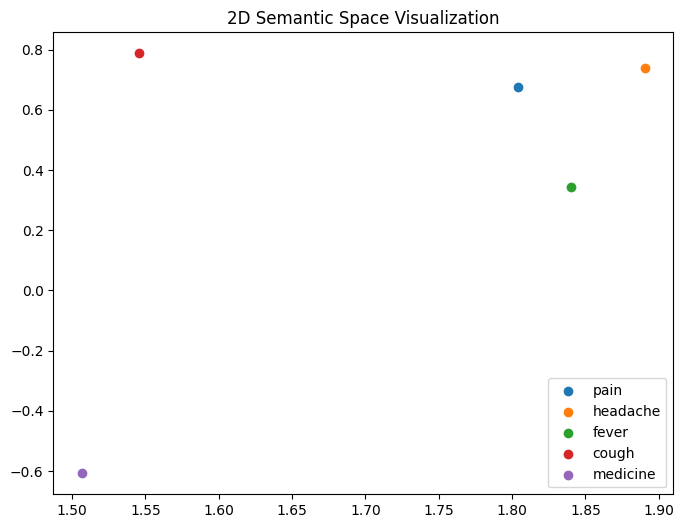

Top 2 similar words to 'pain':
discomfort (Similarity: 0.8420)
throbbing (Similarity: 0.7835)


In [12]:
# PCA for dimensionality reduction to visualize in 2D
pca = PCA(n_components=2)
word_vectors_2d = pca.fit_transform(model.wv.vectors)

# Visualize a subset of words in 2D semantic space
subset_words = ['pain', 'headache', 'fever', 'cough', 'medicine']
subset_indices = [model.wv.key_to_index[word] for word in subset_words]

plt.figure(figsize=(8, 6))
for i, word in enumerate(subset_words):
    plt.scatter(word_vectors_2d[subset_indices[i], 0], word_vectors_2d[subset_indices[i], 1], label=word)

plt.legend()
plt.title('2D Semantic Space Visualization')
plt.show()

# Similarity Analysis
def top_similar_words(word, word_vectors, top_n=2):
    similarities = []
    for other_word in word_vectors.index_to_key:
        if other_word != word:
            similarity = word_vectors.similarity(word, other_word)
            similarities.append((other_word, similarity))

    # Sort by similarity in descending order
    similarities.sort(key=lambda x: x[1], reverse=True)

    # Print the top similar words
    print(f"Top {top_n} similar words to '{word}':")
    for i in range(min(top_n, len(similarities))):
        print(f"{similarities[i][0]} (Similarity: {similarities[i][1]:.4f})")


chosen_word = 'pain'
top_similar_words(chosen_word, word_vectors)


# **Observations and Inferences:**

**PCA Dimensionality Reduction:**

Observation: Principal Component Analysis (PCA) is applied to reduce the dimensionality of the word vectors to 2D.

Inference: PCA is commonly used for dimensionality reduction, allowing visualization of high-dimensional data in a lower-dimensional space. It captures the most significant variations in the word vectors.

**2D Semantic Space Visualization:**

Observation: A subset of words ('pain', 'headache', 'fever', 'cough', 'medicine') is visualized in a 2D semantic space.

Inference: This plot provides insights into the relative positions of these words in the learned semantic space. Words that are close to each other in this space may have similar contextual meanings.

**Similarity Analysis Function:**

Observation: A function top_similar_words is defined to find and print the top similar words to a chosen word.

Inference: This function calculates the cosine similarity between the chosen word and all other words in the vocabulary. It then sorts the words based on similarity, printing the top N similar words.

**Similarity Analysis for 'pain':**

Observation: The function is applied to find and print the top similar words to the chosen word 'pain'.

Inference: The output provides words that are most similar to 'pain' based on the learned word vectors. This can be useful for understanding the semantic associations captured by the model.


The code aims to visualize a subset of words in a 2D semantic space using PCA and provides a function for similarity analysis. The 2D visualization can offer a qualitative understanding of the relationships between selected words. The similarity analysis function allows users to explore semantic similarities between words, leveraging the trained Word2Vec model.





